In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sys
sys.path.append("../../../")
%load_ext autoreload
%autoreload 2

In [3]:
from polire.placement import NottDuns, Stationary
from polire.interpolate import Kriging

## Resample and clean

In [4]:
tdata = pd.read_pickle('../dataset/TempData.pickle')
tdata = tdata['2004-02-28':'2004-03-01']
loc_df = pd.read_csv('../dataset/mote_locs.txt', sep=' ',names=[0,'X','Y']).set_index(0)

M = 22
cross_df = pd.crosstab(tdata.index, tdata.ID, tdata.Temp, aggfunc=lambda x:list(x)[0])
cross_df = cross_df.resample(str(M)+'min').mean().dropna(how='any')
print(cross_df.shape, len(cross_df.dropna()), cross_df.cov().dropna().shape)

G_all = (((cross_df - cross_df.mean()).T).dot(cross_df - cross_df.mean())/len(cross_df)) # Estim. Cov. Mat.
G_all_npcov = cross_df.cov()
train_data = loc_df.loc[cross_df.columns][['X','Y']]
train_data['Temp'] = cross_df.mean()

(181, 52) 181 (52, 52)


## Checking stationarity

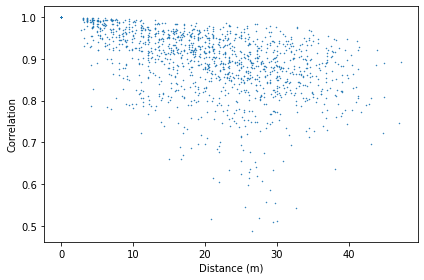

In [5]:
dis = []
cor = []
corr_mat = cross_df.corr()
for col in corr_mat.corr().columns:
    for col2 in corr_mat.corr().columns:
        dis.append(np.linalg.norm(loc_df.loc[col] - loc_df.loc[col2]))
        cor.append(corr_mat.loc[col, col2])
        
fig, ax = plt.subplots()
ax.scatter(dis, cor, s=0.1)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Correlation')
plt.tight_layout()
plt.show()